,participant_id,participant_name,gender,age,handedness,is_followup
0,1,sub-001,F,60,right,True
1,2,sub-002,M,67,right,False
2,3,sub-003,F,44,right,False
3,4,sub-004,F,24,right,False
4,5,sub-005,F,48,right,True


,eeg_metadata_id,task_name,institution_name,institution_address,institutional_department,manufacturer,manufacturer_model_name,cap_manufacturer,cap_model_name,recording_type,eeg_placement_scheme,eeg_reference,sampling_frequency,software_filters,eeg_channel_count,eog_channel_count,power_line_frequency,eeg_ground
0,1,RestingState,Leibniz Research Centre for Working Environmen...,"Dortmund, Germany",Ergonomics,BrainProducts,BrainAmp DC,EasyCap,actiCAP 64,continuous,10-20,FCz,1000,n/a,64,0,50,electrode placed at AFz
1,2,RestingState,Leibniz Research Centre for Working Environmen...,"Dortmund, Germany",Ergonomics,BrainProducts,BrainAmp DC,EasyCap,actiCAP 64,continuous,10-20,FCz,1000,n/a,64,0,50,electrode placed at AFz


,channel_id,channel_name,channel_type,units,low_cutoff,high_cutoff
0,1,Fp1,EEG,µV,DC,250
1,2,Fp2,EEG,µV,DC,250
2,3,F7,EEG,µV,DC,250
3,4,F3,EEG,µV,DC,250
4,5,Fz,EEG,µV,DC,250
...,...,...,...,...,...,...
59,60,PO7,EEG,µV,DC,250
60,61,PO3,EEG,µV,DC,250
61,62,POz,EEG,µV,DC,250
62,63,PO4,EEG,µV,DC,250


,session_id,participant_id,session_name,recording_year,recording_duration,is_followup,recording_filename,eyes_state,cognitive_load_status
0,1,1,sub-001_ses-1_c_post,0,0,False,eeg_raw_ica/sub-001_ses-1_task-EyesClosed_acq-...,C,POST
1,2,1,sub-001_ses-1_c_pre,0,0,False,eeg_raw_ica/sub-001_ses-1_task-EyesClosed_acq-...,C,PRE
2,3,1,sub-001_ses-1_o_post,0,0,False,eeg_raw_ica/sub-001_ses-1_task-EyesOpen_acq-po...,O,POST
3,4,1,sub-001_ses-1_o_pre,0,0,False,eeg_raw_ica/sub-001_ses-1_task-EyesOpen_acq-pr...,O,PRE
4,5,1,sub-001_ses-2_c_post,0,0,True,eeg_raw_ica/sub-001_ses-2_task-EyesClosed_acq-...,C,POST


Gender Distribution:
   gender  count
0      F    376
1      M    232


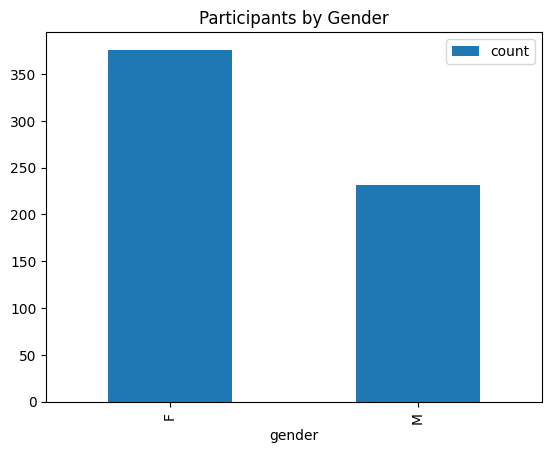

In [ ]:

import duckdb
import pandas as pd

DB_PATH = "/Users/irynagunko/Downloads/SFU/NeuroInsights-EEG/data/neuroinsights.db"
conn = duckdb.connect(database=DB_PATH, read_only=True)

query = "SELECT * FROM participants;"
participants_data = conn.execute(query).fetchdf()
query = "SELECT * FROM eeg_metadata;"
eeg_metadata = conn.execute(query).fetchdf()
query = "SELECT * FROM eeg_channels;"
eeg_channels = conn.execute(query).fetchdf()
query = "SELECT * FROM sessions;"
sessions = conn.execute(query).fetchdf()
display(participants_data.head())
display(eeg_metadata)
display(eeg_channels)
display(sessions.head())

gender_count = conn.execute("SELECT gender, COUNT(*) as count FROM participants GROUP BY gender").fetchdf()
print("Gender Distribution:\n", gender_count)

gender_count.plot(kind='bar', x='gender', y='count', title='Participants by Gender')

conn.close()
